In [218]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [219]:
import os
import pandas as pd
from IPython import get_ipython
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, jaccard_score, recall_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



warnings.filterwarnings("ignore")


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/ricardo.cunha/Documents/GitHub/ds-notebooks/venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: @rpath/libomp.dylib\n  Referenced from: /Users/ricardo.cunha/Documents/GitHub/ds-notebooks/venv/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [120]:
notebook_path = get_ipython().getoutput('echo $(pwd)/$(basename $(ls | grep .ipynb))')[0]
notebook_dir = os.path.dirname(os.path.dirname(notebook_path))
os.chdir(notebook_dir)
print(notebook_dir)

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
df_test = pd.read_csv('data/titanic/test.csv')
df_train = pd.read_csv('data/titanic/train.csv')

# Data profiling

Understand data before preparing it

In [121]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
df_test.shape

(418, 11)

In [123]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
df_train.shape

(891, 12)

In [125]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
#check nulls
df_train.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
df_test.isna().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [128]:
# Checking Imbalance in Data
survived = df_train[df_train['Survived']==1]['Survived'].count()
not_survived = df_train[df_train['Survived']==0]['Survived'].count()
print('survived: ',survived,', not_survived: ',not_survived)

survived:  342 , not_survived:  549


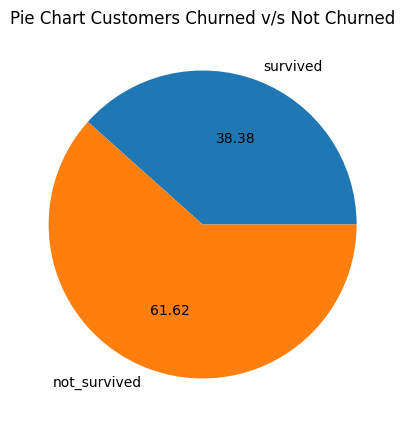

In [129]:
# Pie Plot
fig = plt.figure(figsize=(5,5)) 
plt.pie([survived,not_survived], labels=['survived','not_survived'],autopct='%.2f')
plt.title('Pie Chart Customers Churned v/s Not Churned')
plt.show()

## Create new features

In [130]:
df_train['CabinSector'] = df_train['Cabin'].apply(lambda x: x[0].upper() if not pd.isnull(x) else x).fillna('N/A')
df_test['CabinSector'] = df_train['Cabin'].apply(lambda x: x[0].upper() if not pd.isnull(x) else x).fillna('N/A')

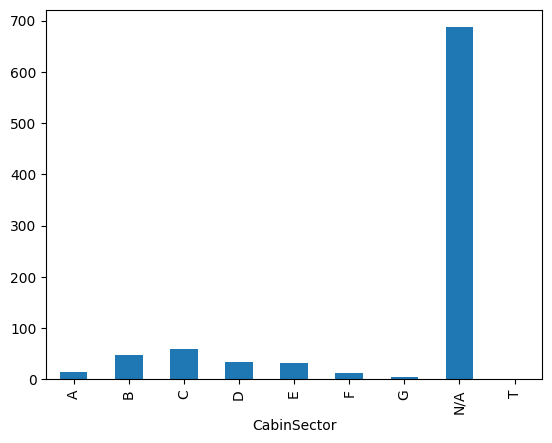

In [131]:
df_train.groupby(['CabinSector'])['PassengerId'].count().plot(kind='bar')
plt.show()

In [132]:
cabins = df_train['Cabin'].str.split(" ", expand=True)
cabins = pd.concat([df_train[['PassengerId']], cabins], axis=1)
cabins = cabins.melt(id_vars=['PassengerId'], var_name='cabin_n', value_name='cabin').drop('cabin_n', axis=1)
cabins = cabins[~(cabins['cabin'].isna())]
cabins_group = cabins.groupby(['cabin']).count().reset_index(False).rename(columns={'PassengerId': 'count_guests'})
cabins_final = cabins.merge(cabins_group, how='inner', on='cabin')
passengers_group_size = cabins_final.groupby(['PassengerId']).agg({'count_guests': 'max'}).reset_index(False)

df_train = df_train.merge(passengers_group_size, how='left', on='PassengerId')

def n_guests(x):
    if x>1:
        return 'Y'
    elif x==1:
        return 'N'
    else:
        return 'N/A'

df_train['HasGuests'] = df_train['count_guests'].apply(lambda x: n_guests(x))
df_train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinSector,count_guests,HasGuests
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,N/A,NaN,N/A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1.0,N
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,N/A,NaN,N/A
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2.0,Y
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,N/A,NaN,N/A


In [133]:
cabins = df_test['Cabin'].str.split(" ", expand=True)
cabins = pd.concat([df_test[['PassengerId']], cabins], axis=1)
cabins = cabins.melt(id_vars=['PassengerId'], var_name='cabin_n', value_name='cabin').drop('cabin_n', axis=1)
cabins = cabins[~(cabins['cabin'].isna())]
cabins_group = cabins.groupby(['cabin']).count().reset_index(False).rename(columns={'PassengerId': 'count_guests'})
cabins_final = cabins.merge(cabins_group, how='inner', on='cabin')
passengers_group_size = cabins_final.groupby(['PassengerId']).agg({'count_guests': 'max'}).reset_index(False)

df_test = df_test.merge(passengers_group_size, how='left', on='PassengerId')

def n_guests(x):
    if x>1:
        return 'Y'
    elif x==1:
        return 'N'
    else:
        return 'N/A'

df_test['HasGuests'] = df_test['count_guests'].apply(lambda x: n_guests(x))
df_test.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinSector,count_guests,HasGuests
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,N/A,NaN,N/A
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,C,NaN,N/A
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,N/A,NaN,N/A
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,C,NaN,N/A
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,N/A,NaN,N/A


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinSector,count_guests
HasGuests,,,,,,,,,,,,,
N,57,57,57,57,55,57,57,57,57,57,57,57,57
N/A,327,327,327,327,245,327,327,327,326,0,327,327,0
Y,34,34,34,34,32,34,34,34,34,34,34,34,34


## Data visalization and correlations

Analysis of correlations and data visalization of interatctions

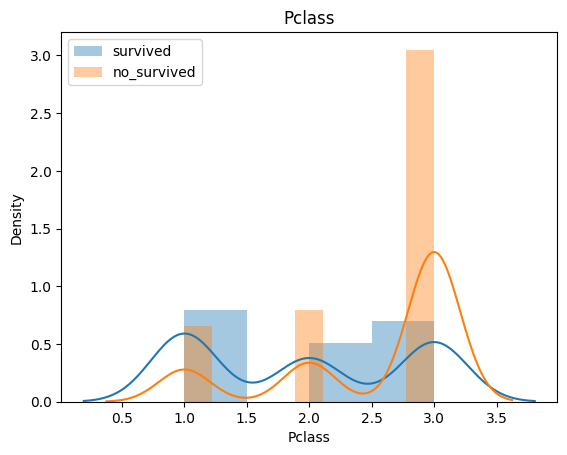

In [137]:
# Pclass in survived vs no survivie
survived = df_train[df_train['Survived']==1]['Pclass']
no_survived = df_train[df_train['Survived']==0]['Pclass']
sns.distplot(survived,label='survived')
sns.distplot(no_survived,label='no_survived')
plt.title('Pclass')
plt.legend()
plt.show()

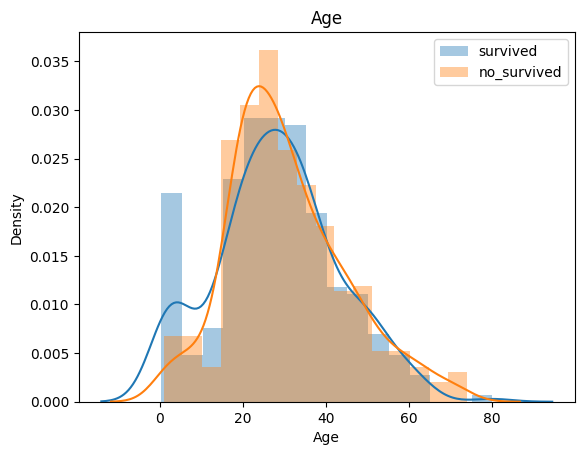

In [138]:
# Pclass in survived vs no survivie
survived = df_train[df_train['Survived']==1]['Age']
no_survived = df_train[df_train['Survived']==0]['Age']
sns.distplot(survived,label='survived')
sns.distplot(no_survived,label='no_survived')
plt.title('Age')
plt.legend()
plt.show()

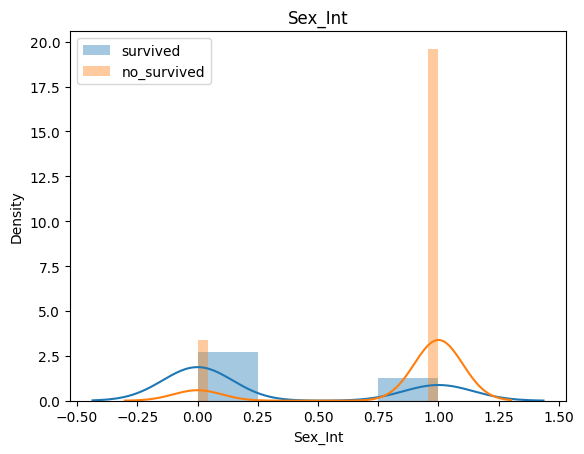

In [139]:
# Sex in survived vs no survivie
sex_dict = {'male': 1, 'female': 0}
df_train['Sex_Int'] = df_train['Sex'].map(sex_dict)

survived = df_train[df_train['Survived']==1]['Sex_Int']
no_survived = df_train[df_train['Survived']==0]['Sex_Int']
sns.distplot(survived,label='survived')
sns.distplot(no_survived,label='no_survived')
plt.title('Sex_Int')
plt.legend()
plt.show()

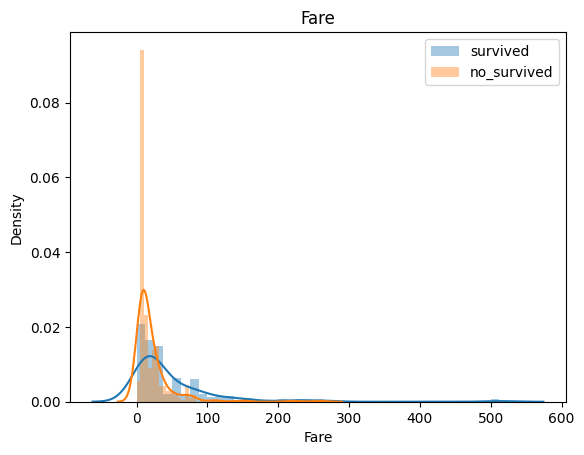

In [140]:
# Fare in survived vs no survivie
survived = df_train[df_train['Survived']==1]['Fare']
no_survived = df_train[df_train['Survived']==0]['Fare']
sns.distplot(survived,label='survived')
sns.distplot(no_survived,label='no_survived')
plt.title('Fare')
plt.legend()
plt.show()

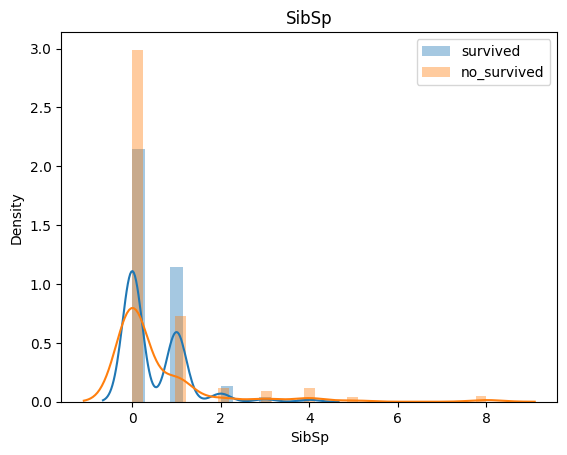

In [142]:
# SibSp in survived vs no survivie
survived = df_train[df_train['Survived']==1]['SibSp']
no_survived = df_train[df_train['Survived']==0]['SibSp']
sns.distplot(survived,label='survived')
sns.distplot(no_survived,label='no_survived')
plt.title('SibSp')
plt.legend()
plt.show()

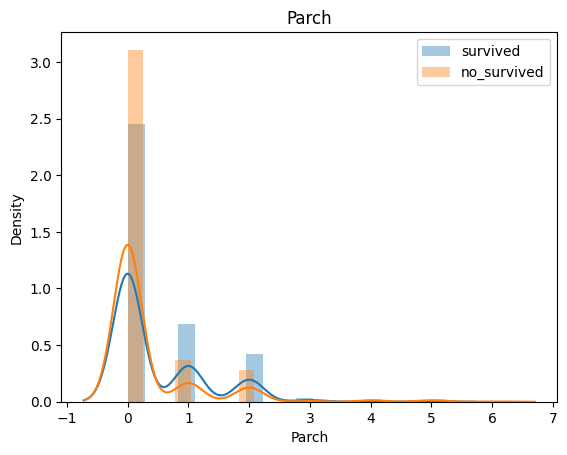

In [143]:
# Parch in survived vs no survivie
survived = df_train[df_train['Survived']==1]['Parch']
no_survived = df_train[df_train['Survived']==0]['Parch']
sns.distplot(survived,label='survived')
sns.distplot(no_survived,label='no_survived')
plt.title('Parch')
plt.legend()
plt.show()

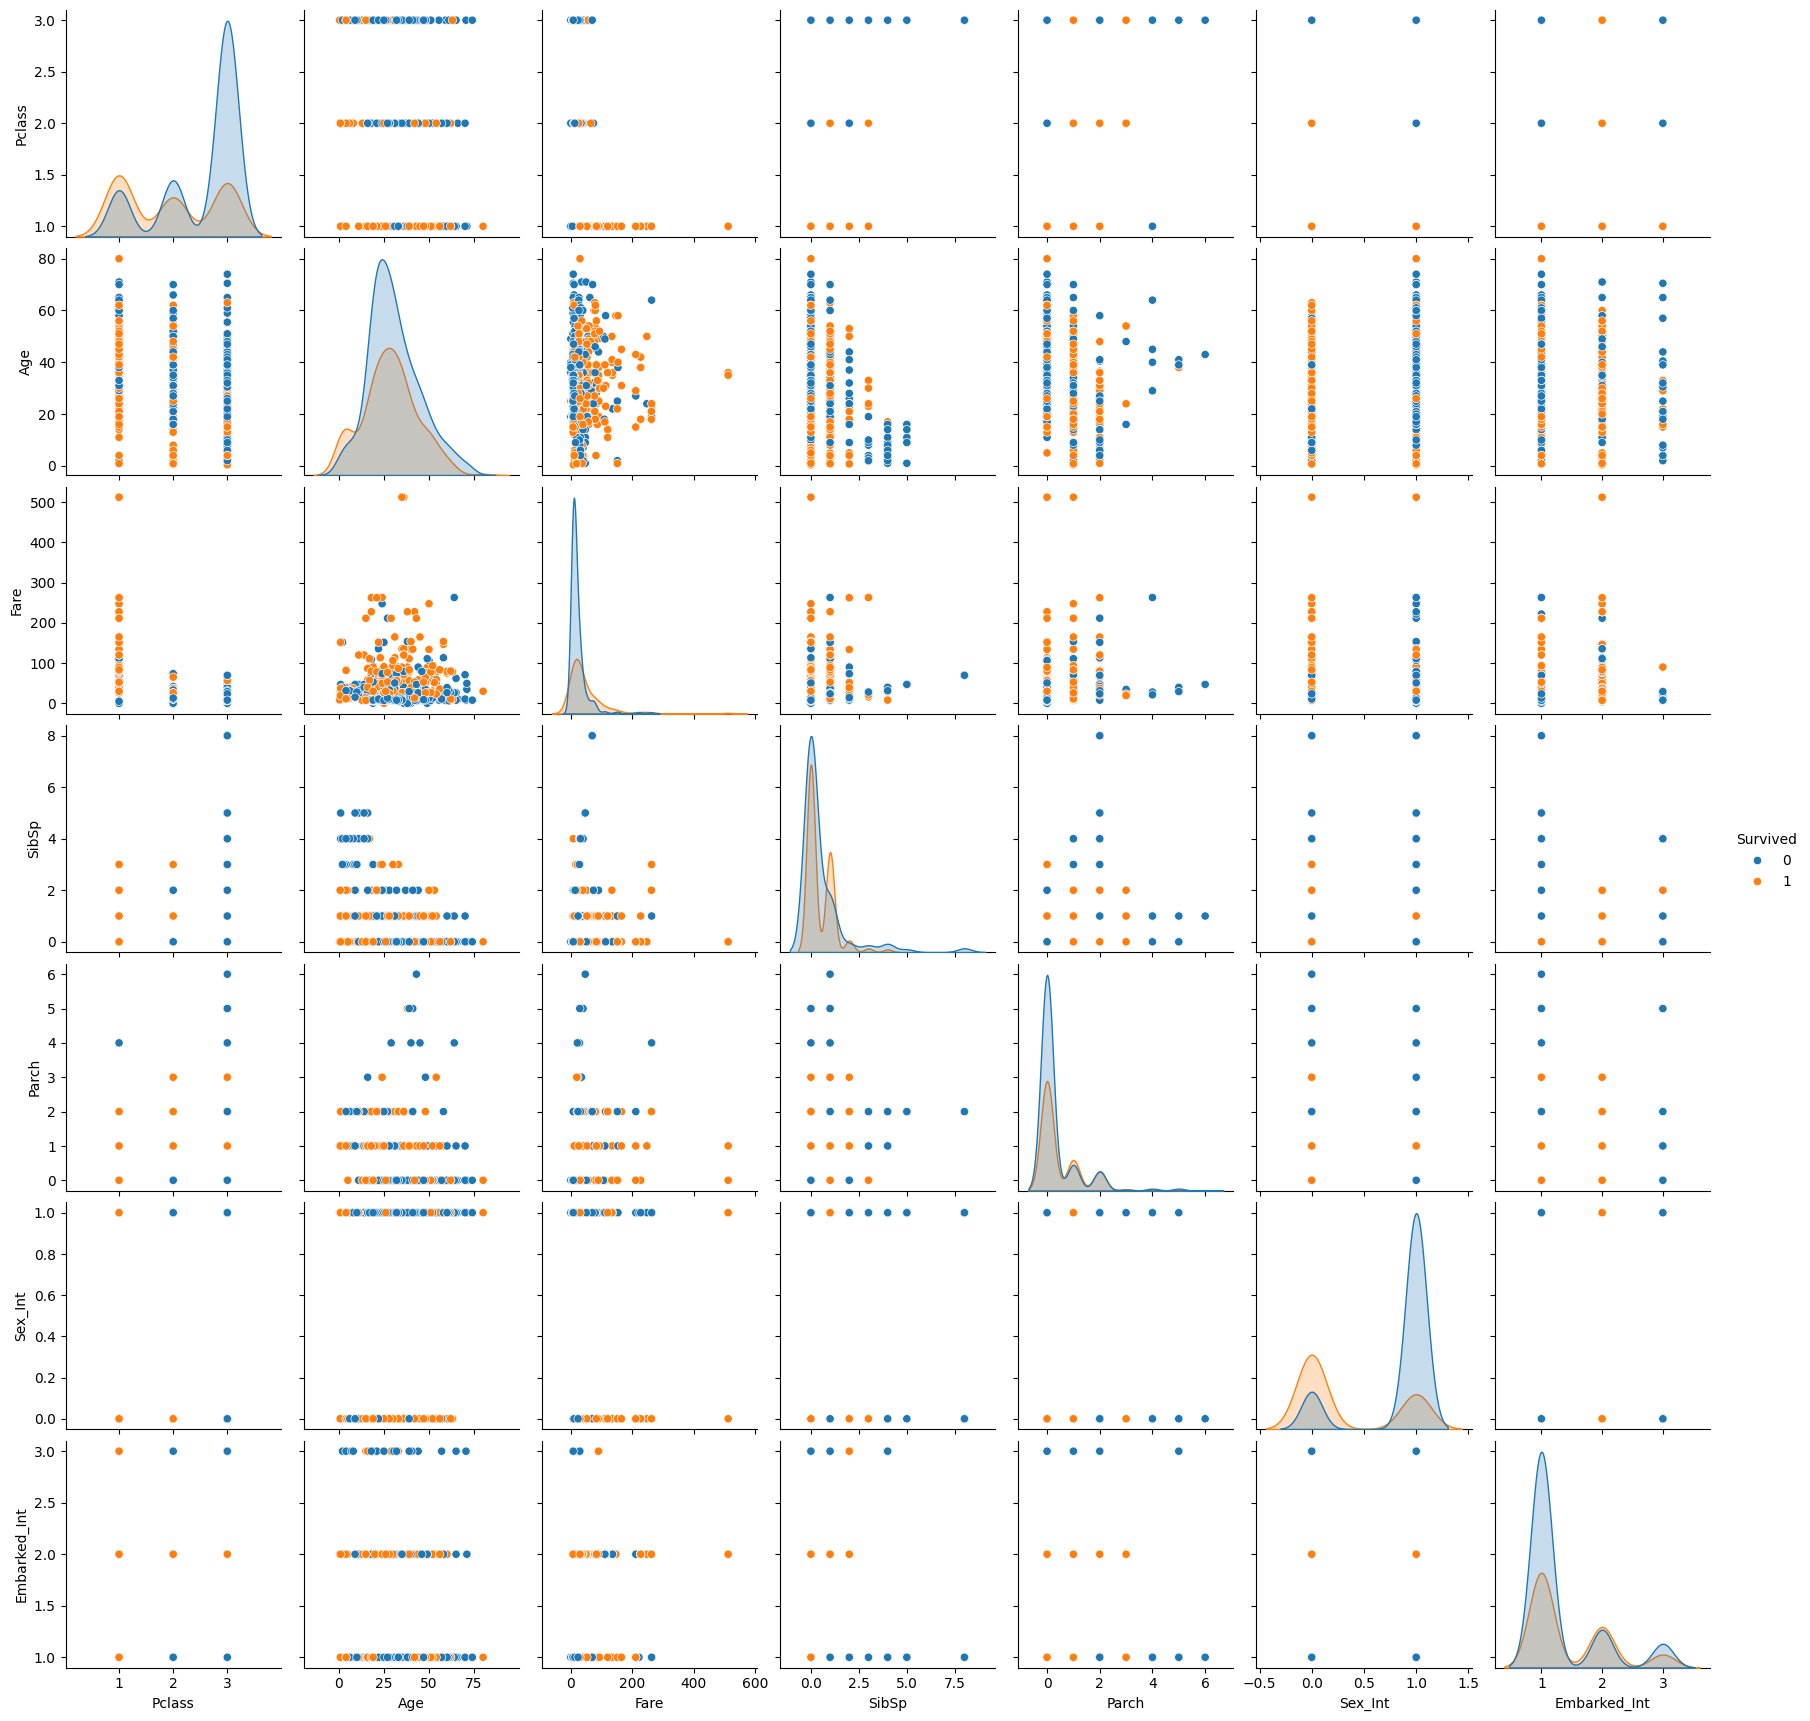

In [144]:
df_train_show = df_train.copy()
sex_dict = {'male': 1, 'female': 0}
df_train_show['Sex_Int'] = df_train_show['Sex'].map(sex_dict)

embarked_dict = {'S': 1, 'C': 2, 'Q': 3, 'N/A': 4}
df_train_show['Embarked_Int'] = df_train_show['Embarked'].map(embarked_dict)

sns.pairplot(df_train_show,
             vars=['Pclass',
                   'Age', 
                   'Fare',
                   'SibSp',
                   'Parch',
                   'Sex_Int',
                   'Embarked_Int',
                  ],
             hue='Survived'
            )

<Axes: >

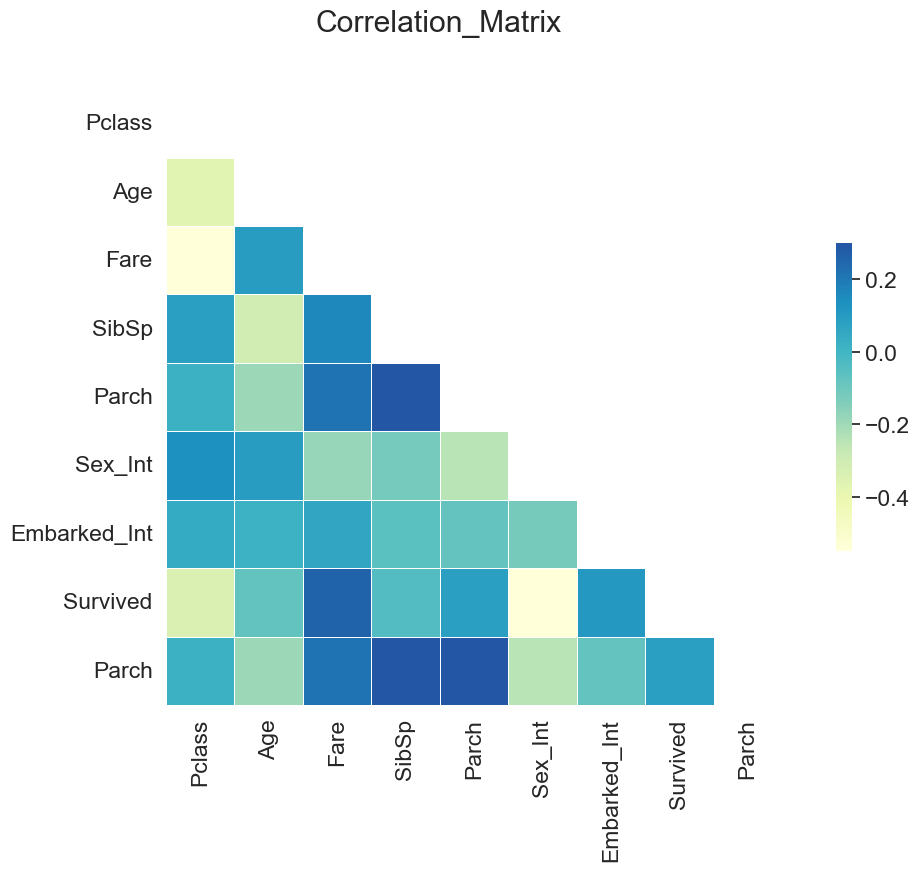

In [145]:
df_train_numbers = df_train_show[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex_Int', 'Embarked_Int', 'Survived', 'Parch']]

sns.set(style="white", font_scale =1.5)
corr = df_train_numbers.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Fill nulls

Fill nulls of the columns of age and cabin

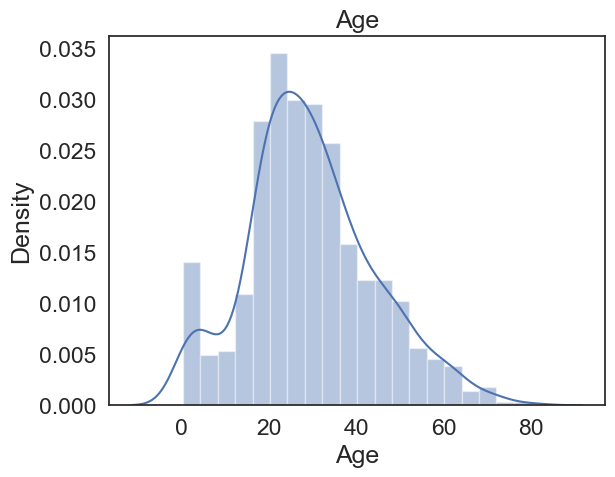

In [146]:
# Age
sns.distplot(df_train['Age'],label='Age')
plt.title('Age')
plt.show()

In [147]:
mean = df_train['Age'].mean()
std = df_train['Age'].std()


nan_count = df_train['Age'].isna().sum()
random_values = np.random.normal(mean, std, nan_count)
df_train.loc[df_train['Age'].isna(), 'Age'] = random_values

In [148]:
mean = df_test['Age'].mean()
std = df_test['Age'].std()

nan_count = df_test['Age'].isna().sum()
random_values = np.random.normal(mean, std, nan_count)
df_test.loc[df_test['Age'].isna(), 'Age'] = random_values

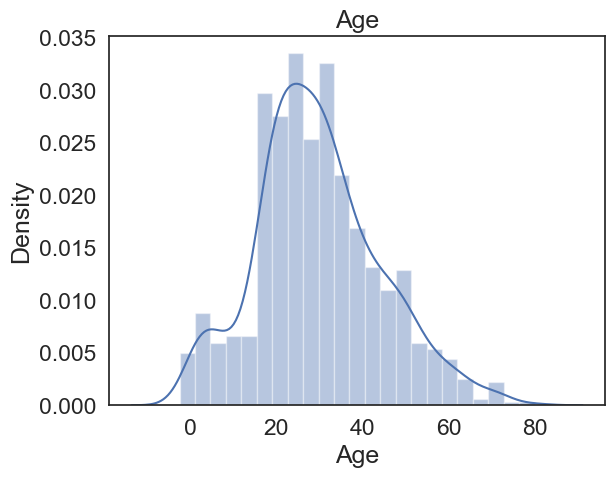

In [149]:
# Age
sns.distplot(df_train['Age'],label='Age')
plt.title('Age')
plt.show()

In [150]:
df_train.groupby('Embarked')['PassengerId'].count()
df_train['Embarked'] = df_train['Embarked'].fillna('N/A')
df_train.groupby('Embarked')['PassengerId'].count()

Embarked
C      168
N/A      2
Q       77
S      644
Name: PassengerId, dtype: int64

In [151]:
df_test.groupby('Embarked')['PassengerId'].count()
df_test['Embarked'] = df_train['Embarked'].fillna('N/A')
df_test.groupby('Embarked')['PassengerId'].count()

# .plot(kind='bar', x='Category', y='Values', legend=False)
# plt.title('Cabin')
# plt.show()

Embarked
C       80
N/A      1
Q       41
S      296
Name: PassengerId, dtype: int64

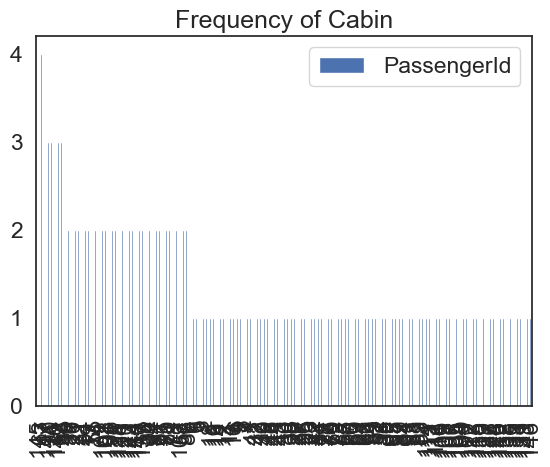

In [152]:
df_cabin_group = df_train.groupby('Cabin')['PassengerId'].count().reset_index().sort_values('PassengerId', ascending=False)
df_cabin_group.plot(kind='bar')
plt.title('Frequency of Cabin')
plt.show()

In [153]:
df_train['Fare'].fillna(df_train['Fare'].mean(), inplace = True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace = True)

## Data manipulation

In [154]:
# Prepare test and train data to manupulate it

relevant_columns = [
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked',
    'HasGuests',
    'CabinSector',
]

y_var = 'Survived'


_x_train = df_train[relevant_columns]
_y_train = df_train[y_var]

x_test = df_test[relevant_columns]

x_train,x_valid,y_train,y_valid = train_test_split(_x_train, _y_train,test_size=0.15,stratify=_y_train,random_state=11)
print('Shape of x_train and y_train: ',x_train.shape, y_train.shape)
print('Shape of x_valid and y_valid: ',x_valid.shape, y_valid.shape)
print('Shape of x_test : ',x_test.shape)

Shape of x_train and y_train:  (757, 9) (757,)
Shape of x_valid and y_valid:  (134, 9) (134,)
Shape of x_test :  (418, 9)


In [156]:
#  Encoding Factor Variables - if variables are nominal

nominal_features = ['Pclass', 'Sex', 'Embarked', 'HasGuests', 'CabinSector']

onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  

list_dfs_train = []
list_dfs_test = []
list_dfs_valid = []
for var in nominal_features:
    x_train_encoded = pd.DataFrame(onehot_encoder.fit_transform(x_train[[var]]), index = x_train.index)
    x_train_encoded.columns = onehot_encoder.get_feature_names_out(input_features=[var])

    x_valid_encoded = pd.DataFrame(onehot_encoder.transform(x_valid[[var]]), index=x_valid.index)
    x_valid_encoded.columns = onehot_encoder.get_feature_names_out(input_features=[var])

    x_test_encoded = pd.DataFrame(onehot_encoder.transform(x_test[[var]]), index=x_test.index)
    x_test_encoded.columns = onehot_encoder.get_feature_names_out(input_features=[var])

    list_dfs_train.append(x_train_encoded)
    list_dfs_test.append(x_test_encoded)
    list_dfs_valid.append(x_valid_encoded)


x_train_nominal = pd.concat(list_dfs_train, axis =1)
x_test_nominal = pd.concat(list_dfs_test, axis =1)
x_valid_nominal = pd.concat(list_dfs_valid, axis =1)

In [157]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

x_train_numerical = x_train[numerical_features]
x_test_numerical = x_test[numerical_features]
x_valid_numerical = x_valid[numerical_features]

scaler = StandardScaler()

x_train_numerical_scaled = pd.DataFrame(
    scaler.fit_transform(x_train_numerical),
    columns=x_train_numerical.columns,
    index=x_train_numerical.index
)

x_test_numerical_scaled = pd.DataFrame(
    scaler.fit_transform(x_test_numerical),
    columns=x_test_numerical.columns,
    index=x_test_numerical.index
)

x_valid_numerical_scaled = pd.DataFrame(
    scaler.fit_transform(x_valid_numerical),
    columns=x_valid_numerical.columns,
    index=x_valid_numerical.index
)


In [158]:
x_train_merged = pd.concat([ x_train_nominal , x_train_numerical_scaled], axis=1)
x_test_merged =  pd.concat([ x_test_nominal , x_test_numerical_scaled], axis=1)
x_valid_merged = pd.concat([ x_valid_nominal , x_valid_numerical_scaled], axis=1)


print(f"Shape of x_train_merged {x_train_merged.shape} \t and y_trai {y_train.shape}")
print(f"Shape of x_valid_merged {x_valid_merged.shape} \t and y_valid {y_valid.shape}")

Shape of x_train_merged (757, 20) 	 and y_trai (757,)
Shape of x_valid_merged (134, 20) 	 and y_valid (134,)


In [163]:
x_train_merged.head()

,Pclass_2,Pclass_3,Sex_male,Embarked_N/A,Embarked_Q,Embarked_S,HasGuests_N/A,HasGuests_Y,CabinSector_B,CabinSector_C,CabinSector_D,CabinSector_E,CabinSector_F,CabinSector_G,CabinSector_N/A,CabinSector_T,Age,Fare,SibSp,Parch
210,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.399798,-0.507806,-0.458556,-0.460627
150,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.470453,-0.402046,-0.458556,-0.460627
875,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.023215,-0.504425,-0.458556,-0.460627
838,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.154350,0.447332,-0.458556,-0.460627
138,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.953947,-0.465952,-0.458556,-0.460627


# Apply Models

Trying models to see which one is best

### Logistic Regression

In [191]:
log_reg = LogisticRegression()
log_reg.fit(x_train_merged,y_train)

y_pred = log_reg.predict(x_valid_merged)

log_reg_accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
jaccard = jaccard_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

print (f"Accuracy: {log_reg_accuracy}")
print (f"F1: {f1}")
print (f"Jaccard: {jaccard}")
print (f"Recall: {recall}")

Accuracy: 0.8432835820895522
F1: 0.7835051546391752
Jaccard: 0.6440677966101694
Recall: 0.7450980392156863


### RandomForest

In [174]:
rf_class = RandomForestClassifier(
    random_state=43, 
    n_estimators=100,  # Number of trees in random forest
    max_depth=10,       # Maximum number of levels in tree
)

rf_class.fit(x_train_merged,y_train)

y_pred = rf_class.predict(x_valid_merged)

rf_accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
jaccard = jaccard_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

print (f"Accuracy: {rf_accuracy}")
print (f"F1: {f1}")
print (f"Jaccard: {jaccard}")
print (f"Recall: {recall}")

Accuracy: 0.7985074626865671
F1: 0.6966292134831461
Jaccard: 0.5344827586206896
Recall: 0.6078431372549019


Fitting 5 folds for each of 18 candidates, totalling 90 fits


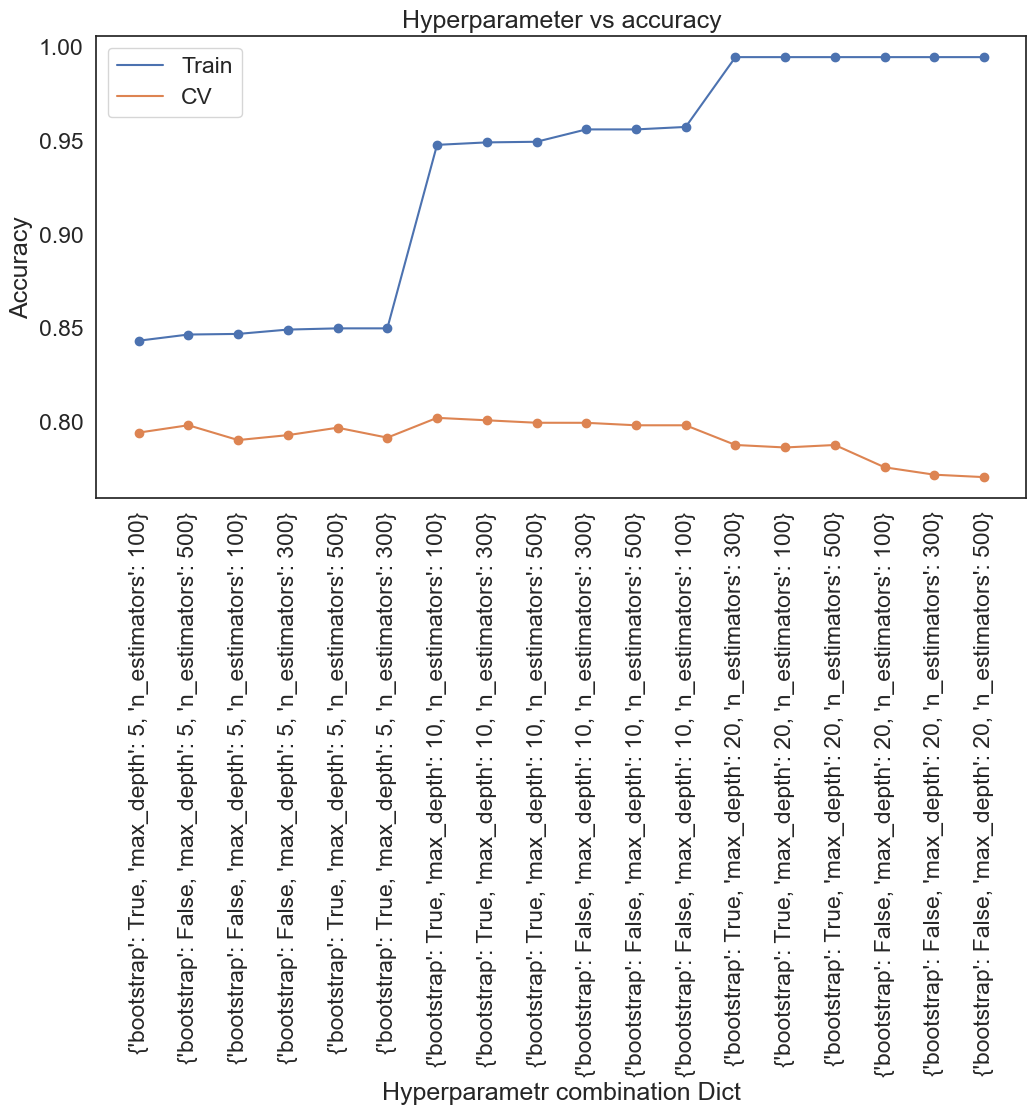

In [166]:
# Grid Search

parameters = {
  'max_depth':    [5,10,20], 
  'n_estimators': [100,300,500],
  'bootstrap': [True, False],
  # 'min_samples_leaf': [1, 2, 4],
  # 'min_samples_split': [2, 5, 10]
}

clf_rf = RandomForestClassifier(class_weight='balanced', random_state=43)

grid = GridSearchCV(
    estimator=clf_rf,
    param_grid=parameters,
    scoring= 'accuracy',
    return_train_score= True,
    verbose=1
)

grid.fit(x_train_merged, y_train)

cv_result = pd.DataFrame(grid.cv_results_).sort_values(by= 'mean_train_score', ascending=True)
params = list(cv_result['params'].astype(str))

plt.figure(figsize=(12,6))
plt.title('Hyperparameter vs accuracy')
plt.scatter(params, cv_result['mean_train_score'])
plt.plot(params, cv_result['mean_train_score'], label='Train')
plt.scatter(params, cv_result['mean_test_score'])
plt.plot(params, cv_result['mean_test_score'], label="CV")
plt.legend()
plt.xlabel('Hyperparametr combination Dict')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')
plt.show()

In [175]:
rf_class = RandomForestClassifier(
    random_state=43, 
    n_estimators=100,  # Number of trees in random forest
    max_depth=10,       # Maximum number of levels in tree
    bootstrap = True, # Method of selecting samples for training each tree
)
rf_class.fit(x_train_merged,y_train)

y_pred = rf_class.predict(x_valid_merged)

rf_accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
jaccard = jaccard_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

print (f"Accuracy: {rf_accuracy}")
print (f"F1: {f1}")
print (f"Jaccard: {jaccard}")
print (f"Recall: {recall}")

Accuracy: 0.7985074626865671
F1: 0.6966292134831461
Jaccard: 0.5344827586206896
Recall: 0.6078431372549019


[2.07474810e-02 6.94280853e-02 2.80153949e-01 1.49438031e-04
 9.63408779e-03 2.70376002e-02 3.30624390e-02 2.48365856e-02
 8.72408639e-03 8.00404985e-03 4.14552400e-03 1.27098247e-02
 2.04338260e-03 1.39111651e-03 2.29907777e-02 4.38412452e-04
 1.89248632e-01 1.89023253e-01 5.16406621e-02 4.45906126e-02]


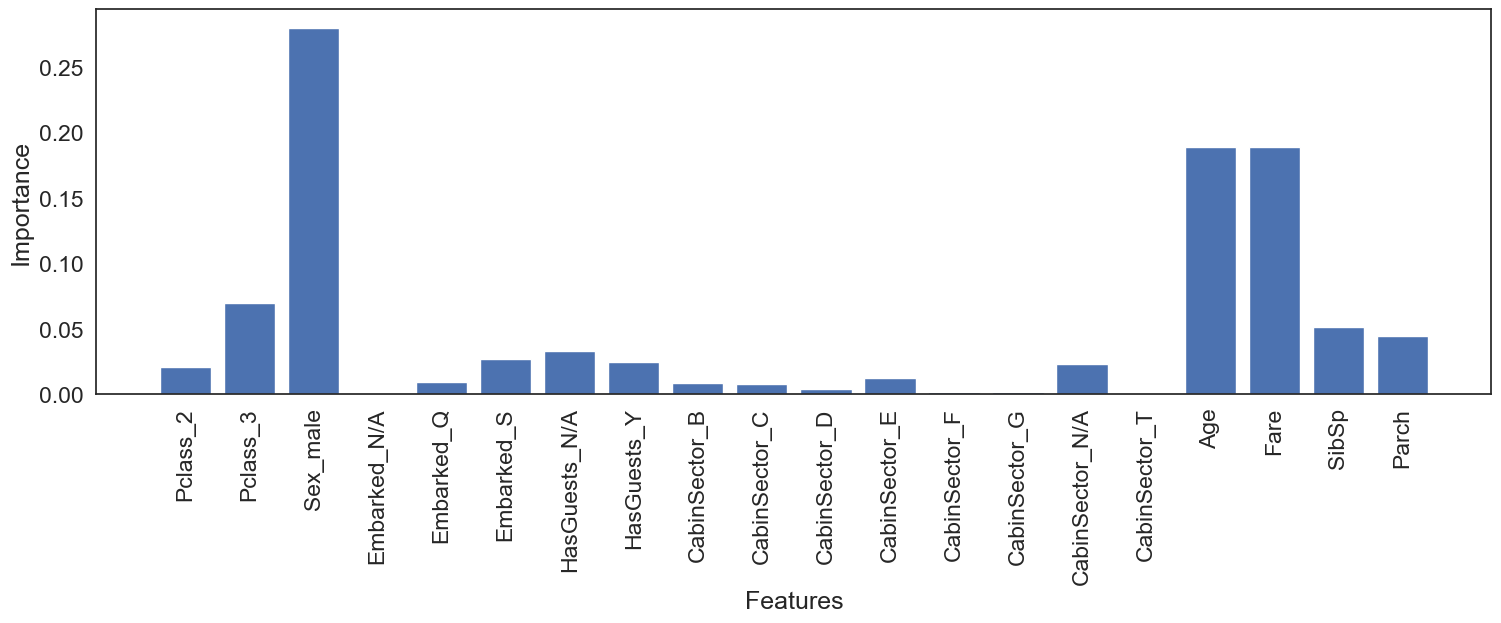

In [176]:
importance = rf_class.feature_importances_
all_features = list(x_train_merged.columns)
print (importance)
fig = plt.figure(figsize=(18,5))
plt.bar(all_features, importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

### Perceptron 

In [182]:
perceptron = Perceptron(max_iter=20)
perceptron.fit(x_train_merged,y_train)

y_pred = perceptron.predict(x_valid_merged)

perceptron_accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
jaccard = jaccard_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

print (f"Accuracy: {perceptron}")
print (f"F1: {f1}")
print (f"Jaccard: {jaccard}")
print (f"Recall: {recall}")



Accuracy: Perceptron(max_iter=20)
F1: 0.5121951219512195
Jaccard: 0.3442622950819672
Recall: 0.4117647058823529


### Stochastic Gradient Descent 

In [184]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train_merged,y_train)

y_pred = sgd.predict(x_valid_merged)

sgd_accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
jaccard = jaccard_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

print (f"Accuracy: {sgd_accuracy}")
print (f"F1: {f1}")
print (f"Jaccard: {jaccard}")
print (f"Recall: {recall}")


Accuracy: 0.8283582089552238
F1: 0.7722772277227723
Jaccard: 0.6290322580645161
Recall: 0.7647058823529411


### Linear Support Vector Machine

In [186]:
linear_svc = LinearSVC()
linear_svc.fit(x_train_merged,y_train)

y_pred = linear_svc.predict(x_valid_merged)

linear_svc_accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
jaccard = jaccard_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

print (f"Accuracy: {linear_svc_accuracy}")
print (f"F1: {f1}")
print (f"Jaccard: {jaccard}")
print (f"Recall: {recall}")

Accuracy: 0.8283582089552238
F1: 0.7628865979381443
Jaccard: 0.6166666666666667
Recall: 0.7254901960784313


### GBM

In [187]:
gbm = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=1.0, 
    max_depth=1, 
    random_state=42
)
gbm.fit(x_train_merged,y_train)

y_pred = gbm.predict(x_valid_merged)

gbm_accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
jaccard = jaccard_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)

print (f"Accuracy: {gbm_accuracy}")
print (f"F1: {f1}")
print (f"Jaccard: {jaccard}")
print (f"Recall: {recall}")

Accuracy: 0.7761194029850746
F1: 0.6590909090909091
Jaccard: 0.4915254237288136
Recall: 0.5686274509803921


In [199]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'Logistic Regression', 
              'Random Forest', 
              'Perceptron', 
              'Stochastic Gradient Decent', 
              'GBM'],
    'Accuracy': [linear_svc_accuracy, 
              log_reg_accuracy, 
              rf_accuracy, 
              perceptron_accuracy, 
              sgd_accuracy, 
              gbm_accuracy
             ]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df.head()

,Model
Accuracy,
0.843284,Logistic Regression
0.828358,Support Vector Machines
0.828358,Stochastic Gradient Decent
0.798507,Random Forest
0.776119,GBM


In [216]:
y_pred = rf_class.predict(x_test_merged)

final = df_test[['PassengerId']]
final['Survived'] = y_pred

# y_pred = log_reg.predict(x_valid_merged)


In [217]:
final.to_csv('output/titanic/sumbission.csv', index=False, sep=",")